In [2]:
# This program uses Random_Forest_Regressor_Model to predict player salaries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Establishing the data to use
df_train = pd.read_excel('Training_Data.xlsx')
df_test = pd.read_excel('Test_Data.xlsx')


#Composing the training data
train_source_columns = df_train[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]

train_source = train_source_columns.values

#Our salary column from the training data
train_target_columns = df_train[['2024-25 Salary()']]
train_target = train_target_columns.values


In [3]:
#Preparing the Test_set data
test_source_columns = df_test[['Minutes',
                                 'FG%',
                                 '3P%',
                                 'FT%',
                                 'REB',
                                 'AST',
                                 'STL',
                                 'BLK',
                                 'PF',
                                 'PPG',
                                 'Age']]

test_source = test_source_columns.values

#Defining our salaries from the test set
test_target_columns = df_test[['2024-25 Salary']]
test_target = test_target_columns.values



In [4]:
#Training the model 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(train_source, train_target)

/Users/supremestudier/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [5]:
# Make predictions with the model
test_predictions = model.predict(test_source)

In [6]:
#Determining the Average percent Error for the test_set data
#This also considering the Prediction Error
p_t_err = abs((test_predictions - test_target)/test_target)* 100
#Taking the average percent error
print(np.average(p_t_err))


323.1646153128568


In [7]:
#Taking the cumulative and average error 
diff_t = abs(test_predictions - test_target)

#cumulative error
cum_t_err = np.sum(diff_t)
print(cum_t_err)

#average error
avg_error = np.average(diff_t)
print(avg_error)

121530922437.54001
12654198.50453353


(98, 1)


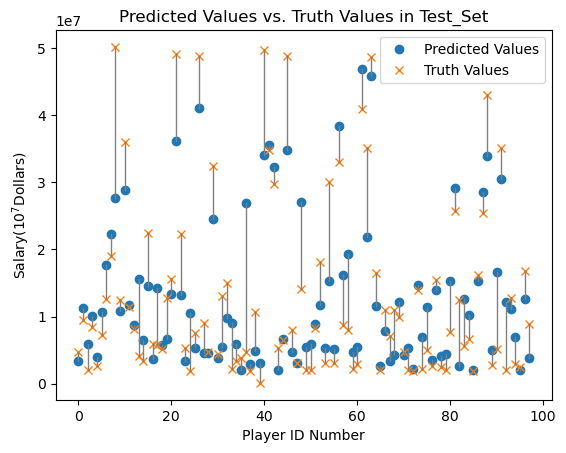

In [24]:
#Plotting the results from the test data
plt.title('Predicted Values vs. Truth Values in Test_Set')
plt.plot(test_predictions,'o',label = 'Predicted Values')
plt.plot(test_target,'x',label = 'Truth Values')

#Refine predictions to run through the loop
tp = np.array([test_predictions])
tp_data = np.transpose(tp)
print(np.shape(tp_data))
#Adding lines to connect the predicted values to the truth values
for i in range(len(tp_data)):
    plt.plot([i, i], [test_target[i], tp_data[i]], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Player ID Number')
plt.ylabel('Salary($10^{7}$Dollars)')
plt.legend()

In [9]:
# Applying the same data analysis for the training data
# This is analysis to determine whether the test set is a good fit

# Making the predictions with the training data
train_predictions = model.predict(train_source)



In [10]:
# Calculate the average percent error for the training data
p_tr_error = (abs(train_predictions - train_target)/train_target) * 100

# Average Percent Error for training data
print(np.average(p_tr_error))

252.79277002249444


In [11]:
# Calculating cumulative error and average error for the training data
diff_tr = abs(train_predictions - train_target)

cum_tr_diff = np.sum(diff_tr)

#Cumulative Error
print(cum_tr_diff)

#Average Error

avg_tr_diff = np.average(diff_tr)

print(avg_tr_diff)



1075568362416.0203
12528606.767883379


(293, 1)
(293, 1)


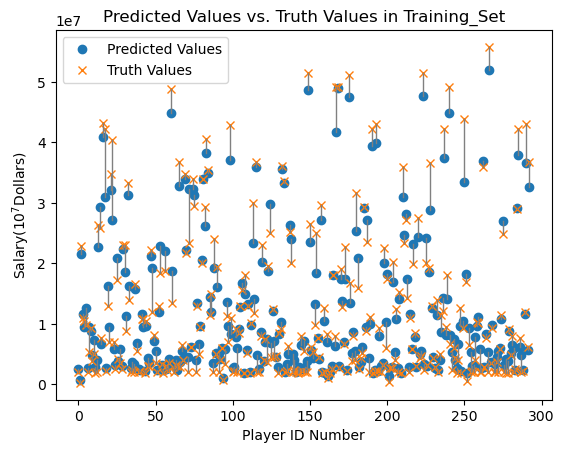

In [29]:
#Plotting the analysis for the predicted values vs. the truth values for training data
plt.title('Predicted Values vs. Truth Values in Training_Set')
plt.plot(train_predictions,'o',label = 'Predicted Values')
plt.plot(train_target,'x',label = 'Truth Values')

#Refine the predictions to make it suitable for plotting
trp = np.array([train_predictions])
trp_data = np.transpose(trp)
print(np.shape(trp_data))
print(np.shape(train_target)) #same shape so it will work
#Draw a line from the predicted value points to the truth value ones
for i in range(len(trp_data)):
    plt.plot([i, i], [train_target[i], trp_data[i]], color='gray', linestyle='-', linewidth=1)
plt.xlabel('Player ID Number')
plt.ylabel('Salary($10^{7}$Dollars)')
plt.legend()

In [ ]:
#Making a prediction for Bronny's salary
Bronny = [2.6, 16.7, 0.0, 100, 0.2, 0.3, 0.2, 0.0, 0.3, 6, 20]
Br = np.array([Bronny])
Br_values = Br.reshape(-1,11)

#Predicting Bronny's salary
Br_sal = model.predict(Br_values)
print(Br_sal)

# This is the predicted salary for Bronny using the random forest method
# This model predicts Bronny will make $2106944.26 based on his stats

[2106944.26]
